Lec 6.1 All Challenge Problems


### Using the 1980 monthly SST netcdf file we used last time: Take the annual mean and plot it with the correct lat and lon. Use a different colormap than the default. Add axes labels, a colorbar and title. In the title, include what the plotted variable is and the units.

In [6]:
# first thing to do is to import the necessary modules

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [21]:
data = xr.open_dataset('/Users/abigailpozulp/Downloads/CESM.003.SST.1980.nc')

In [22]:
lat = np.array(data.lat)
lon = np.array(data.lon)
data = np.array(data.SST)

In [23]:
data.shape

# 12 months, 180 lat, 360 long

(12, 180, 360)

In [27]:
meandata = np.mean(data, axis = 0)
meandata.shape

(180, 360)

Text(0.5, 0, 'Longitude')

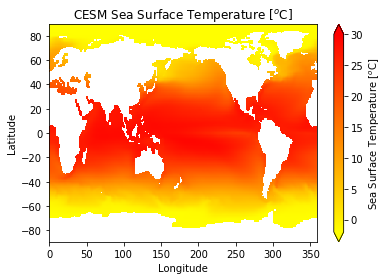

In [28]:
fig, ax = plt.subplots()
p = ax.pcolormesh(lon, lat, meandata, cmap="autumn_r", vmin=-2, vmax=30)
#cmap "autumn_r" is specifying a colormap other than the default

cb = plt.colorbar(p, extend="both")

# Aesthetics
cb.set_label('Sea Surface Temperature [$^{o}$C]')
ax.set_title('CESM Sea Surface Temperature [$^{o}$C]')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

## Take seasonal averages: DJF, etc. Plot the four seasons in a 2x2 plot of subplots, label each plot and put on one colorbar for all the plots, ends extended, with a min value of 0 and a max of 30. Make a descriptive supertitle (suptitle) for all the plots. Would it be correct to label these plots Winter, etc?


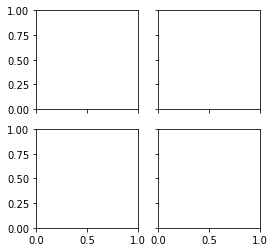

In [29]:
#### to get an array of plots
fig, ax = plt.subplots(figsize=(4,4), nrows=2, ncols=2, sharex=True, sharey=True)

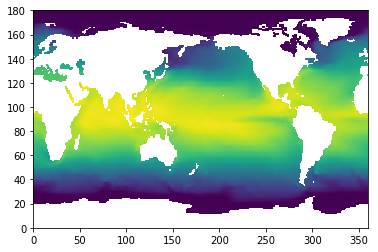

In [30]:
# to get one month of data
plt.pcolormesh(data[5,:,:])

In [31]:
### to take seasonal averages you need to get the means of:
#Winter: December, January, February (0,1,11)
#Spring: March, April, May (2,3,4)
#Summer: June, July, August (5,6,7)
#Fall: September, October, November (8,9,10)


In [32]:
# to get 3 consecutive months of data, with the march, april, may (2,3,4)
spring = (data[(2,3,4),:,:])

In [33]:
# to average the data of those three months into one value, first note the shape of it
spring.shape

(3, 180, 360)

In [34]:
# as seen above we want to average the first axis (0) which has the months in it

spring_mean = np.mean(data[(2,3,4),:,:], axis=0)

In [35]:
# now you have a shape where there is only one averaged value for the month temps SST
spring_mean.shape

(180, 360)

In [36]:
summer_mean = np.mean(data[(5,6,7),:,:], axis=0)

In [37]:
winter_mean = np.mean(data[(0,1,11),:,:], axis=0)

In [38]:
fall_mean = np.mean(data[(8,9,10),:,:], axis=0)

#### ready to plot these seasonal averages

Text(0.5, 1.0, 'Sep/Oct/Nov')

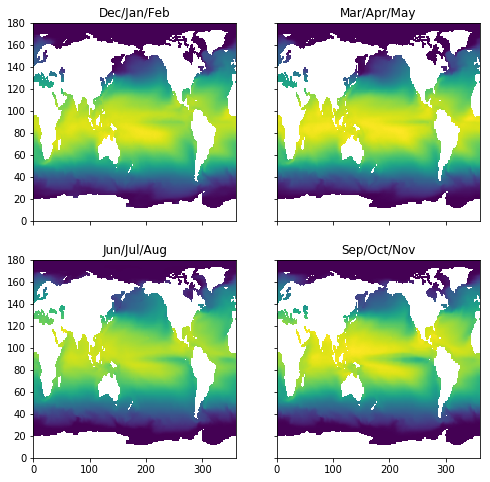

In [39]:
fig, ax = plt.subplots(figsize=(8,8), nrows=2, ncols=2, sharex=True, sharey=True)
im = ax[0,0].pcolormesh(winter_mean)
im = ax[0,1].pcolormesh(spring_mean)
im = ax[1,0].pcolormesh(summer_mean)
im = ax[1,1].pcolormesh(fall_mean)

ax[0,0].set_title('Dec/Jan/Feb')
ax[0,1].set_title('Mar/Apr/May')
ax[1,0].set_title('Jun/Jul/Aug')
ax[1,1].set_title('Sep/Oct/Nov')

Text(0.5, 1.0, 'Fall')

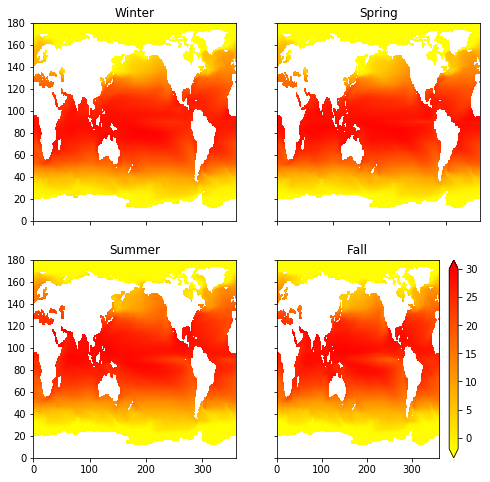

In [40]:
fig, ax = plt.subplots(figsize=(8,8), nrows=2, ncols=2, sharex=True, sharey=True)

im = ax[0,0].pcolormesh(winter_mean, cmap="autumn_r", vmin=-2, vmax=30)
im = ax[0,1].pcolormesh(spring_mean, cmap="autumn_r", vmin=-2, vmax=30)
im = ax[1,0].pcolormesh(summer_mean, cmap="autumn_r", vmin=-2, vmax=30)
im = ax[1,1].pcolormesh(fall_mean,  cmap="autumn_r", vmin=-2, vmax=30)

cb = plt.colorbar(p, extend="both")

ax[0,0].set_title('Winter')
ax[0,1].set_title('Spring')
ax[1,0].set_title('Summer')
ax[1,1].set_title('Fall')


### Mask out regions outside of the tropics (google definition of tropics) and plot the annual mean again. Adjust the font size of your axes labels and title. Adjust the axis limits to be constrained to the data (i.e. no whitespace).


In [41]:
# to check if the southern latitude values are negative, open up the array you defined at "lat"
lat

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

#becaue latitude goes from negative, to positive, to zero, you can define the tropics as latitudes between -23.5 and 23.5

In [42]:
mymask = (lat >= -23.5) & (lat<= 23.5)

In [43]:
# this will mask the tropics only
mymask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [44]:
# this will mask the regions outside of the tropics
nontropic_mask = ((lat >= 23.5) & (lat<= 89.5)|(lat>= -89.5) & (lat<= -23.5))

In [45]:
nontropic_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [46]:
nontropic_mask.shape


(180,)

In [47]:
# in order to apply the mask, it needs to have the same number of axes as the dataset
# the dataset should have two axes (after you take the mean of the months)
# the mask I made only has one axis, how do I spread it to the others?

In [48]:
   #what are we doing here????
mean_data = np.mean(data, axis = 0)
nontropic_mask = np.zeros_like(mean_data)

In [49]:
mean_data.shape

(180, 360)

In [50]:
# now you have two axes for the mask
nontropic_mask.shape


(180, 360)

In [51]:
nontropic_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [204]:
# your mask is the right shape, with two axes but there are no values

### I am stuck at this part where the "like zeros" gives the mask the right shape, but the "for" loop gives it the wrong shape and it still has zeros